# Derivados Financieros 2023- Clase 4 
## Modelo Black Scholes y comparaciones con el mercado

    1) Formula de Black Scholes
    2) Revisar los plots usando BS en vez de Binomial (Ejercicio)
    3) Comparacion con Market Data - tasa y dividendos
    4) Volatilidad Implicita
    5) Griegas

## 1) Formula de Black Scholes

In [1]:
import math
import numpy as np
from scipy.stats import norm
import sys
sys.path.append('..')

from Codigo.opcion_europea_bin import opcion_europea_bin
from Codigo.opcion_europea_bin_c import opcion_europea_bin_c
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bs import opcion_europea_bs



Def
    Calculador del precio de una opcion Europea con el modelo de Black Scholes
Inputs
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
Outputs
    - precio_BS: float - Precio del contrato

In [2]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma =0.25
div = 0

In [3]:
#Defino los ds
d1 = (math.log(S / K) + (r - div + 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)
d2 = (math.log(S / K) + (r - div - 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)

print(d1)
print(d2)

0.325
0.07500000000000001


In [4]:
if tipo == "C":
    precio_BS = math.exp(-div*T) *S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
elif tipo == "P":
    precio_BS = K * math.exp(-r * T) * norm.cdf(-d2) - math.exp(-div*T) * S * norm.cdf(-d1)

In [5]:
precio_BS

12.335998930368717

## 2) Comparacion con el modelo Binomial [Ejercicio]

In [6]:
pasos = 5000
precio_bin = opcion_europea_bin(tipo, S, K, T, r, sigma, div,pasos)
precio_bs = opcion_europea_bs(tipo, S, K, T, r, sigma, div)

print("Precio de Black Scholes : ", precio_bs)
print("Precio Modelo Binomial  : ", precio_bin)

Precio de Black Scholes :  12.335998930368717
Precio Modelo Binomial  :  12.33550453323051


## 3) Modelo Black Scholes y comparaciones con el mercado

In [7]:
from Codigo.data_nyse import obtener_panel_opciones_nyse
from Codigo.data_nyse import obtener_opciones_yahoo_finance


In [8]:
ticker = 'TSLA'
panel_nyse = obtener_panel_opciones_nyse(ticker,True)

C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calls = calls.append(data.option_chain(vencimiento)[0])
C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  puts = puts.append(data.option_chain(vencimiento)[1])
C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calls = calls.append(data.option_chain(vencimiento)[0])
C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:21: FutureWarning: The frame.append method is deprecated and 

C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  puts = puts.append(data.option_chain(vencimiento)[1])
C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calls = calls.append(data.option_chain(vencimiento)[0])
C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  puts = puts.append(data.option_chain(vencimiento)[1])
C:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:25: FutureWarning: The frame.append method is deprecated and wi

In [9]:
#Me quedo con una parte pequenha del panel

panel_nyse = panel_nyse[panel_nyse.TTM<100]
panel_nyse = panel_nyse[panel_nyse.Moneyness>=0.8]
panel_nyse = panel_nyse[panel_nyse.Moneyness<=1.2]

panel_nyse

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Bid,Ask
56,TSLA230811C00212500,TSLA,253.860001,C,212.5,5,42.40,1.194635,0.628910,40.50,42.40
57,TSLA230811P00212500,TSLA,253.860001,P,212.5,5,0.10,1.194635,0.574223,0.00,0.09
58,TSLA230811C00215000,TSLA,253.860001,C,215.0,5,38.65,1.180744,0.931153,37.60,39.90
59,TSLA230811P00215000,TSLA,253.860001,P,215.0,5,0.10,1.180744,0.583989,0.06,0.10
60,TSLA230811C00217500,TSLA,253.860001,C,217.5,5,37.20,1.167172,0.648441,35.75,37.45
...,...,...,...,...,...,...,...,...,...,...,...
1575,TSLA231020P00305000,TSLA,253.860001,P,305.0,75,52.03,0.832328,0.450872,54.85,56.95
1576,TSLA231020C00310000,TSLA,253.860001,C,310.0,75,6.85,0.818903,0.504491,6.75,6.95
1577,TSLA231020P00310000,TSLA,253.860001,P,310.0,75,55.65,0.818903,0.450994,58.90,61.20
1578,TSLA231020C00315000,TSLA,253.860001,C,315.0,75,6.21,0.805905,0.505925,6.05,6.20


### Panel con datos necesarios para pricear

In [10]:
# tasa de descuento
# dividendos

import yfinance as yf

data = yf.Ticker(ticker)

try:
    div = float(data.info['dividendYield'])
except:
    div = 0.0


In [11]:

panel_nyse['Div'] = div

### Curva de tasas (ad-hoc, poco robusta)

In [12]:
#Libor
#https://es.global-rates.com/tipos-de-interes/libor/dolar-usa/dolar-usa.aspx
#Ad hoc curve de tasas:


Dias = np.array([1, 30, 91, 182])

Tasas = np.array([0.053,
                 0.0543,
                 0.0563,
                 0.0586])

curva = np.vstack((Dias, Tasas)).T

from scipy import interpolate
curva_interp = interpolate.interp1d(Dias, Tasas, fill_value='extrapolate')

panel_nyse['Tasa'] = curva_interp(panel_nyse.TTM)


In [13]:
curva_interp(50)


array(0.05495574)

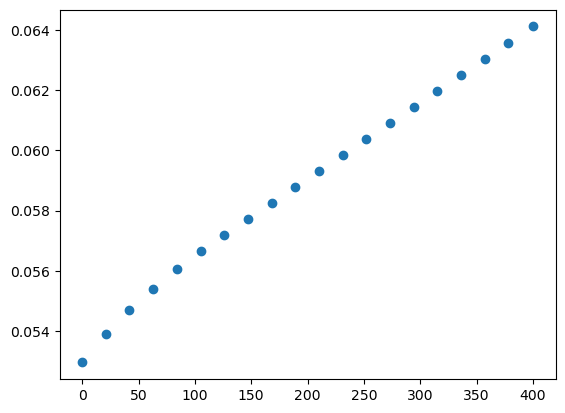

In [14]:

points = 20
tasas = []
days = []
for day in np.trunc(np.linspace(0,400,points)):
    days.append(day)
    tasas.append(curva_interp(day))
    
from matplotlib import pyplot as plt

plt.scatter(days,tasas)

In [15]:

panel_nyse['Avg'] = (panel_nyse.Bid+panel_nyse.Ask)/2


panel_nyse = panel_nyse[panel_nyse.TTM>0]
panel_nyse = panel_nyse[panel_nyse.impliedVolatility>0]

panel_nyse = panel_nyse[['Especie', 'Ticker', 'Spot', 'Moneyness','CallPut', 'Strike', 'TTM',  'impliedVolatility','Last', 'Bid','Ask','Avg', 'Tasa', 'Div']]
panel_nyse['Precio_BS'] = 0.0
panel_nyse['Precio_BIN'] = 0.0

#Tresuries
#panel_nyse['Tasa'] = 0.0005


In [16]:
panel_nyse

,Especie,Ticker,Spot,Moneyness,CallPut,Strike,TTM,impliedVolatility,Last,Bid,Ask,Avg,Tasa,Div,Precio_BS,Precio_BIN
56,TSLA230811C00212500,TSLA,253.860001,1.194635,C,212.5,5,0.628910,42.40,40.50,42.40,41.450,0.053179,0.0,0.0,0.0
57,TSLA230811P00212500,TSLA,253.860001,1.194635,P,212.5,5,0.574223,0.10,0.00,0.09,0.045,0.053179,0.0,0.0,0.0
58,TSLA230811C00215000,TSLA,253.860001,1.180744,C,215.0,5,0.931153,38.65,37.60,39.90,38.750,0.053179,0.0,0.0,0.0
59,TSLA230811P00215000,TSLA,253.860001,1.180744,P,215.0,5,0.583989,0.10,0.06,0.10,0.080,0.053179,0.0,0.0,0.0
60,TSLA230811C00217500,TSLA,253.860001,1.167172,C,217.5,5,0.648441,37.20,35.75,37.45,36.600,0.053179,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,TSLA231020P00305000,TSLA,253.860001,0.832328,P,305.0,75,0.450872,52.03,54.85,56.95,55.900,0.055775,0.0,0.0,0.0
1576,TSLA231020C00310000,TSLA,253.860001,0.818903,C,310.0,75,0.504491,6.85,6.75,6.95,6.850,0.055775,0.0,0.0,0.0
1577,TSLA231020P00310000,TSLA,253.860001,0.818903,P,310.0,75,0.450994,55.65,58.90,61.20,60.050,0.055775,0.0,0.0,0.0
1578,TSLA231020C00315000,TSLA,253.860001,0.805905,C,315.0,75,0.505925,6.21,6.05,6.20,6.125,0.055775,0.0,0.0,0.0


In [17]:
panel_nyse = panel_nyse[panel_nyse.impliedVolatility>0.1]
panel_nyse = panel_nyse.reset_index()
del panel_nyse['index']

In [18]:
panel_nyse

,Especie,Ticker,Spot,Moneyness,CallPut,Strike,TTM,impliedVolatility,Last,Bid,Ask,Avg,Tasa,Div,Precio_BS,Precio_BIN
0,TSLA230811C00212500,TSLA,253.860001,1.194635,C,212.5,5,0.628910,42.40,40.50,42.40,41.450,0.053179,0.0,0.0,0.0
1,TSLA230811P00212500,TSLA,253.860001,1.194635,P,212.5,5,0.574223,0.10,0.00,0.09,0.045,0.053179,0.0,0.0,0.0
2,TSLA230811C00215000,TSLA,253.860001,1.180744,C,215.0,5,0.931153,38.65,37.60,39.90,38.750,0.053179,0.0,0.0,0.0
3,TSLA230811P00215000,TSLA,253.860001,1.180744,P,215.0,5,0.583989,0.10,0.06,0.10,0.080,0.053179,0.0,0.0,0.0
4,TSLA230811C00217500,TSLA,253.860001,1.167172,C,217.5,5,0.648441,37.20,35.75,37.45,36.600,0.053179,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,TSLA231020P00305000,TSLA,253.860001,0.832328,P,305.0,75,0.450872,52.03,54.85,56.95,55.900,0.055775,0.0,0.0,0.0
429,TSLA231020C00310000,TSLA,253.860001,0.818903,C,310.0,75,0.504491,6.85,6.75,6.95,6.850,0.055775,0.0,0.0,0.0
430,TSLA231020P00310000,TSLA,253.860001,0.818903,P,310.0,75,0.450994,55.65,58.90,61.20,60.050,0.055775,0.0,0.0,0.0
431,TSLA231020C00315000,TSLA,253.860001,0.805905,C,315.0,75,0.505925,6.21,6.05,6.20,6.125,0.055775,0.0,0.0,0.0


In [19]:
for index in panel_nyse.index:
    if panel_nyse.CallPut.values[index] == "C":
        tipo =  "C"
    elif panel_nyse.CallPut.values[index] == "P":
        tipo =  "P"
    S = panel_nyse.Spot.values[index] 
    K = panel_nyse.Strike.values[index]
    T = panel_nyse.TTM.values[index]/365
    r = panel_nyse.Tasa.values[index]
    div = panel_nyse.Div.values[index]
    sigma = panel_nyse.impliedVolatility.values[index]
    
    panel_nyse.Precio_BS.values[index] = opcion_europea_bs(tipo, S, K, T, r, sigma, div)
    panel_nyse.Precio_BIN.values[index] = opcion_americana_bin(tipo, S, K, T, r, sigma, div, 200)
        

In [20]:
panel_nyse

,Especie,Ticker,Spot,Moneyness,CallPut,Strike,TTM,impliedVolatility,Last,Bid,Ask,Avg,Tasa,Div,Precio_BS,Precio_BIN
0,TSLA230811C00212500,TSLA,253.860001,1.194635,C,212.5,5,0.628910,42.40,40.50,42.40,41.450,0.053179,0.0,41.557708,41.556643
1,TSLA230811P00212500,TSLA,253.860001,1.194635,P,212.5,5,0.574223,0.10,0.00,0.09,0.045,0.053179,0.0,0.019017,0.018668
2,TSLA230811C00215000,TSLA,253.860001,1.180744,C,215.0,5,0.931153,38.65,37.60,39.90,38.750,0.053179,0.0,39.710281,39.708944
3,TSLA230811P00215000,TSLA,253.860001,1.180744,P,215.0,5,0.583989,0.10,0.06,0.10,0.080,0.053179,0.0,0.038282,0.037571
4,TSLA230811C00217500,TSLA,253.860001,1.167172,C,217.5,5,0.648441,37.20,35.75,37.45,36.600,0.053179,0.0,36.651850,36.651316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,TSLA231020P00305000,TSLA,253.860001,0.832328,P,305.0,75,0.450872,52.03,54.85,56.95,55.900,0.055775,0.0,53.954090,54.953112
429,TSLA231020C00310000,TSLA,253.860001,0.818903,C,310.0,75,0.504491,6.85,6.75,6.95,6.850,0.055775,0.0,7.326125,7.322722
430,TSLA231020P00310000,TSLA,253.860001,0.818903,P,310.0,75,0.450994,55.65,58.90,61.20,60.050,0.055775,0.0,58.097257,59.197437
431,TSLA231020C00315000,TSLA,253.860001,0.805905,C,315.0,75,0.505925,6.21,6.05,6.20,6.125,0.055775,0.0,6.557513,6.568304


### Elijo un maturity y un tipo de opcion y grafico

In [21]:
TTMs = list(set(panel_nyse.TTM.values))
TTMs.sort()
from matplotlib import pyplot as plt

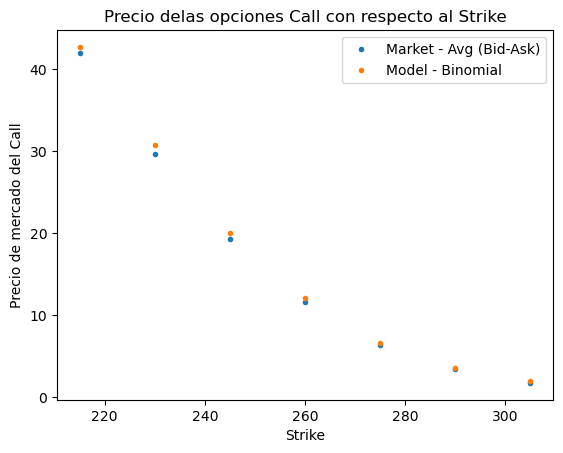

In [22]:
CP = "C"

TTM = TTMs[4]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
#precios_last = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Last.values
precios_avg = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Avg.values
precios_BS = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BS.values
precios_BIN = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BIN.values
    
space = 3
    
#plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], precios_avg[0::space], '.',label = 'Market - Avg (Bid-Ask)')
#plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], precios_BIN[0::space], '.',label = 'Model - Binomial')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio delas opciones Call con respecto al Strike')
    
plt.show()

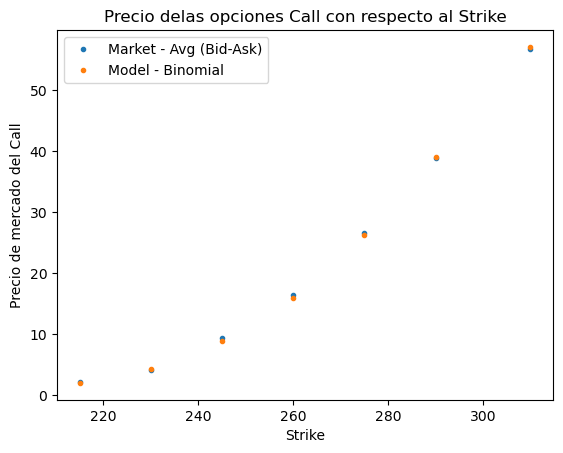

In [23]:

CP = "P"

TTM = TTMs[4]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
precios_last = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Last.values
precios_avg = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Avg.values
precios_BS = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BS.values
precios_BIN = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BIN.values
    
space = 3
    
#plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], precios_avg[0::space], '.',label = 'Market - Avg (Bid-Ask)')
#plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], precios_BIN[0::space], '.',label = 'Model - Binomial')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio delas opciones Call con respecto al Strike')
    
plt.show()

In [24]:
#Me genero un dataframe con fiferencias entre mercado y modelos
CP = "C"
diff_df = panel_nyse[(panel_nyse.TTM == TTMs[1] ) & (panel_nyse.CallPut == CP)][['Avg','Precio_BS','Precio_BIN']]

diff_df['AvgVSBS'] = diff_df.Avg-diff_df.Precio_BS
diff_df['AvgVSBIN'] = diff_df.Avg-diff_df.Precio_BIN

diff_df['Rel_AvgVSBS'] = abs(diff_df.AvgVSBS)/diff_df.Avg * 100
diff_df['Rel_AvgVSBIN'] = abs(diff_df.AvgVSBIN)/diff_df.Avg * 100

diff_df = diff_df[abs(diff_df.Avg)>0.0]

In [25]:
diff_df


,Avg,Precio_BS,Precio_BIN,AvgVSBS,AvgVSBIN,Rel_AvgVSBS,Rel_AvgVSBIN
84,39.975,40.152902,40.147185,-0.177902,-0.172185,0.445033,0.430731
86,35.225,35.383244,35.381652,-0.158244,-0.156652,0.449238,0.444718
88,30.600,30.729492,30.727610,-0.129492,-0.127610,0.423177,0.417027
90,26.475,26.535141,26.539260,-0.060141,-0.064260,0.227160,0.242720
92,24.325,24.364588,24.358974,-0.039588,-0.033974,0.162746,0.139666
94,21.900,21.943355,21.947047,-0.043355,-0.047047,0.197966,0.214826
96,19.875,19.893797,19.885587,-0.018797,-0.010587,0.094576,0.053266
98,17.950,17.942154,17.947401,0.007846,0.002599,0.043710,0.014480
100,16.125,16.089238,16.098059,0.035762,0.026941,0.221778,0.167077
102,14.100,14.194996,14.195198,-0.094996,-0.095198,0.673731,0.675162


In [26]:
print(diff_df.mean(axis=0))


Avg             10.078333
Precio_BS       10.079963
Precio_BIN      10.080335
AvgVSBS         -0.001629
AvgVSBIN        -0.002002
Rel_AvgVSBS      4.800713
Rel_AvgVSBIN     4.903377
dtype: float64


In [27]:
panel_nyse.to_csv('Clase4_panel_nyse_modelos.csv')





## 4) Volatilidad Implicita

Me genero unas funciones auxiliares para definir el metodo de biseccion 

In [28]:
def samesign(a, b):
    return a * b > 0

def bisect(func, low, high, iters=100):
    'Find root of continuous function where f(low) and f(high) have opposite signs'

    assert not samesign(func(low), func(high))

    for i in range(iters):
        midpoint = (low + high) / 2.0
        if samesign(func(low), func(midpoint)):
            low = midpoint
        else:
            high = midpoint

    return midpoint

### Defino la funcion de volatilidad implicita. Busco el cero de la funcion O_T-O_M (opcion teorica menos opcion mercado)

In [29]:

def impvolfunc_bs(tipo, S, K, T, r, precio_mercado, div):
    
    
    func = lambda sigma: (opcion_europea_bs(tipo, S, K, T, r, sigma, div) - precio_mercado)

    impvol = bisect(func,0.00001, 3.0, 100)
    return impvol


def impvolfunc_bin(tipo, S, K, T, r, precio_mercado, div, pasos = 1000):
    func = lambda sigma: (opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos) - precio_mercado)
    
    impvol = bisect(func,0.0001, 3.0, 100)
    return impvol

Recorro el dataframe y copleto la volatilidad implicita

In [30]:
panel_nyse['volatilidad_implicita_bs'] = 0.0

for index in panel_nyse.index:
    
    tipo =  panel_nyse.CallPut.values[index]
    S = panel_nyse.Spot.values[index] 
    K = panel_nyse.Strike.values[index]
    T = panel_nyse.TTM.values[index]/365
    r = panel_nyse.Tasa.values[index]
    div = panel_nyse.Div.values[index]
    precio_mercado = panel_nyse.Avg.values[index]
    try:
        panel_nyse.volatilidad_implicita_bs.values[index] = impvolfunc_bs(tipo, S, K, T, r, precio_mercado, div)
    except:
        pass

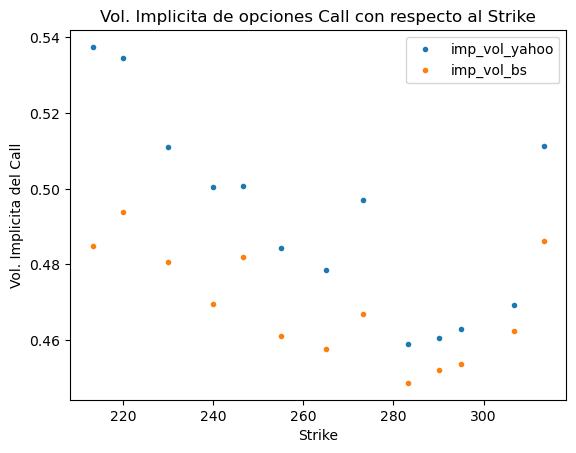

In [31]:
CP = "C"

TTM = TTMs[5]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
imp_vol_yahoo = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].impliedVolatility.values
imp_vol_bs = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].volatilidad_implicita_bs.values

    
space = 3
    
#plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], imp_vol_yahoo[0::space], '.',label = 'imp_vol_yahoo')
#plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], imp_vol_bs[0::space], '.',label = 'imp_vol_bs')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Vol. Implicita del Call')
plt.title('Vol. Implicita de opciones Call con respecto al Strike')
    
plt.show()

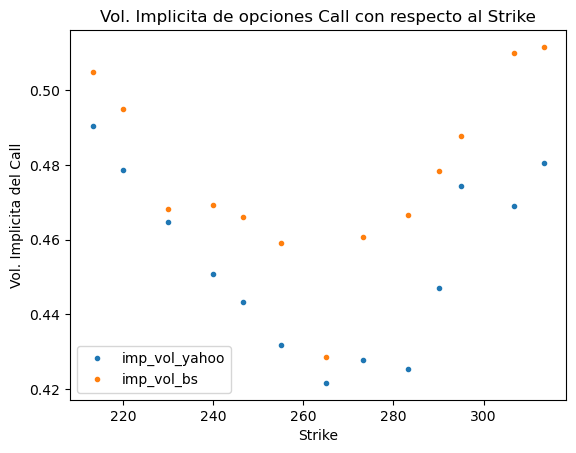

In [32]:
CP = "P"

TTM = TTMs[5]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
imp_vol_yahoo = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].impliedVolatility.values
imp_vol_bs = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].volatilidad_implicita_bs.values

    
space = 3
    
#plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], imp_vol_yahoo[0::space], '.',label = 'imp_vol_yahoo')
#plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], imp_vol_bs[0::space], '.',label = 'imp_vol_bs')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Vol. Implicita del Call')
plt.title('Vol. Implicita de opciones Call con respecto al Strike')
    
plt.show()

## 5) Griegas


Si llamamos $V$ al derivado en cuestion, y el spot vale $S$ a tiempo inicial, entonces la Delta y la Gamma no son otra cosa que:

$$
\Delta = \frac{V(S+h)-V(S-h)}{2h} \; \; \; \; 
\Gamma = \frac{V(S+h)-2V(S)+V(S-h)}{h^2}
$$

con $h$ un numero sificientemente chico (en general se suele tomar la unidad indivisible en cuestion) y suponemos que todos los demas parametros quedan fijo



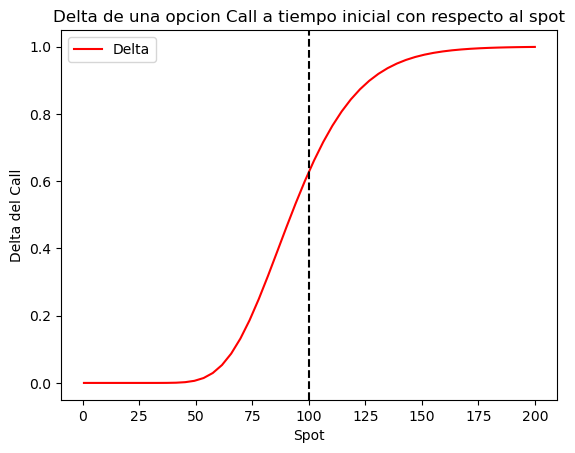

In [33]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*K
S_vec = np.linspace(0.5,S_MAX,50)      
deltas = np.zeros(len(S_vec))

h = 0.1

for index in range(len(S_vec)):
    deltas[index] = (opcion_europea_bs(tipo, S_vec[index]+h, K, T, r, sigma, div) - opcion_europea_bs(tipo, S_vec[index]-h, K, T, r, sigma, div))/(2*h)

plt.plot(S_vec,deltas,'r', label='Delta')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Delta del Call')
plt.title('Delta de una opcion Call a tiempo inicial con respecto al spot')

plt.show()

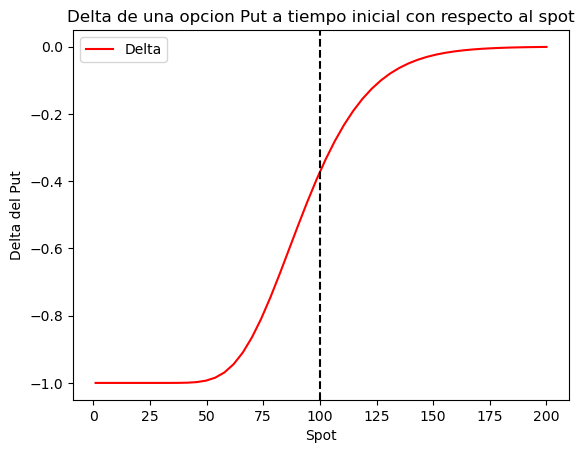

In [34]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(1,S_MAX,50)      
deltas = np.zeros(len(S_vec))

h = 0.1

for index in range(len(S_vec)):
    deltas[index] = (opcion_europea_bs(tipo, S_vec[index]+h, K, T, r, sigma, div) - opcion_europea_bs(tipo, S_vec[index]-h, K, T, r, sigma, div))/(2*h)

plt.plot(S_vec,deltas,'r', label='Delta')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Delta del Put')
plt.title('Delta de una opcion Put a tiempo inicial con respecto al spot')

plt.show()

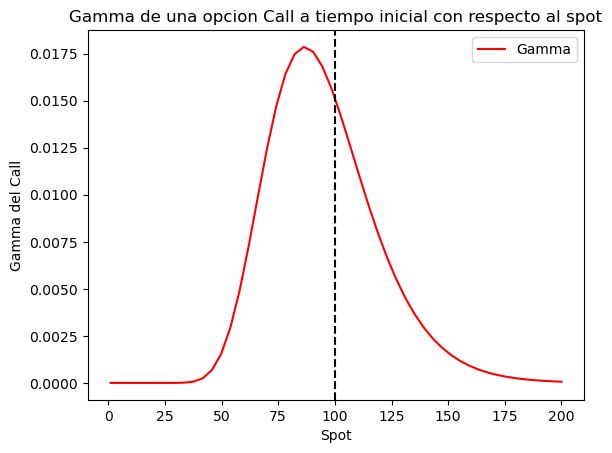

In [35]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(1,S_MAX,50)      
gammas = np.zeros(len(S_vec))

h = 0.1

for index in range(len(S_vec)):
    gammas[index] = (opcion_europea_bs(tipo, S_vec[index]+h, K, T, r, sigma, div) -2* opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma, div) + opcion_europea_bs(tipo, S_vec[index]-h, K, T, r, sigma, div))/(h*h)

plt.plot(S_vec,gammas,'r', label='Gamma')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Gamma del Call')
plt.title('Gamma de una opcion Call a tiempo inicial con respecto al spot')

plt.show()

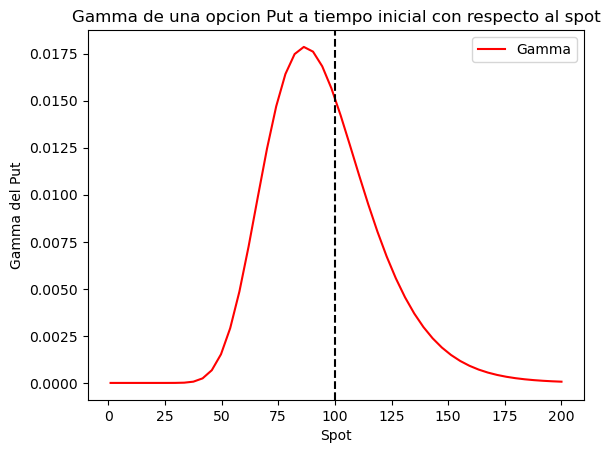

In [36]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(1,S_MAX,50)      
gammas = np.zeros(len(S_vec))

h = 0.1

for index in range(len(S_vec)):
    gammas[index] = (opcion_europea_bs(tipo, S_vec[index]+h, K, T, r, sigma, div) -2* opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma, div) + opcion_europea_bs(tipo, S_vec[index]-h, K, T, r, sigma, div))/(h*h)

plt.plot(S_vec,gammas,'r', label='Gamma')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Gamma del Put')
plt.title('Gamma de una opcion Put a tiempo inicial con respecto al spot')

plt.show()

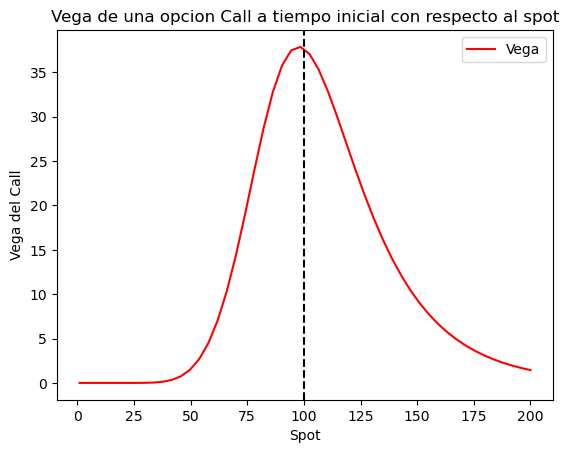

In [37]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(1,S_MAX,50)      
vegas = np.zeros(len(S_vec))

h = 0.1

for index in range(len(S_vec)):
    vegas[index] = (opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma+h, div) - opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma-h, div))/(2*h)

plt.plot(S_vec,vegas,'r', label='Vega')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Vega del Call')
plt.title('Vega de una opcion Call a tiempo inicial con respecto al spot')

plt.show()

Text(0.5, 1.0, 'Vega de una opcion Put a tiempo inicial con respecto al spot')

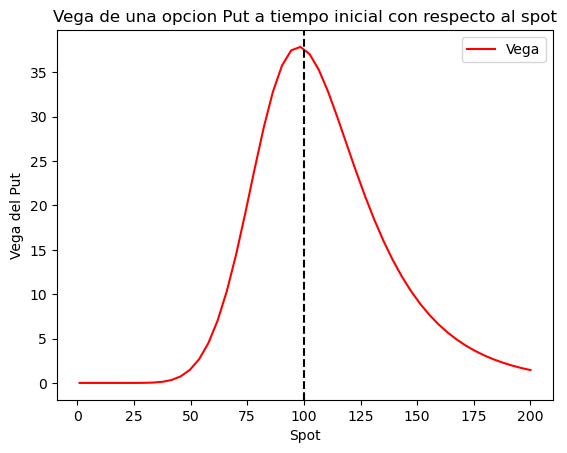

In [38]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(1,S_MAX,50)      
vegas = np.zeros(len(S_vec))

h = 0.1

for index in range(len(S_vec)):
    vegas[index] = (opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma+h, div) - opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma-h, div))/(2*h)

plt.plot(S_vec,vegas,'r', label='Vega')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Vega del Put')
plt.title('Vega de una opcion Put a tiempo inicial con respecto al spot')


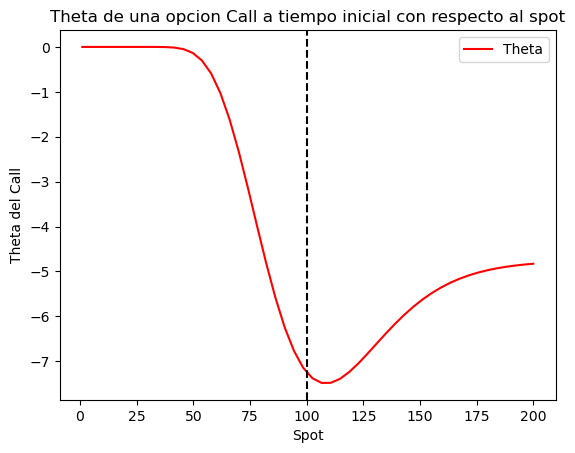

In [39]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(1,S_MAX,50)      
thetas = np.zeros(len(S_vec))

h = 1/365

for index in range(len(S_vec)):
    thetas[index] = (opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma, div) - opcion_europea_bs(tipo, S_vec[index], K, T+h, r, sigma, div))/(h)

plt.plot(S_vec,thetas,'r', label='Theta')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Theta del Call')
plt.title('Theta de una opcion Call a tiempo inicial con respecto al spot')

plt.show()

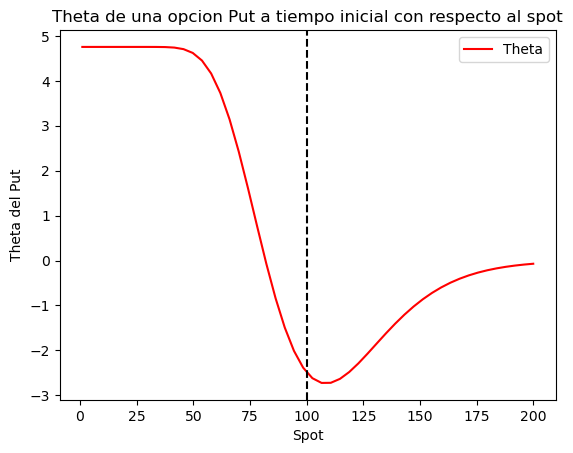

In [40]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 1000

S_MAX = 2*S
S_vec = np.linspace(1,S_MAX,50)      
thetas = np.zeros(len(S_vec))

h = 1/365

for index in range(len(S_vec)):
    thetas[index] = (opcion_europea_bs(tipo, S_vec[index], K, T, r, sigma, div) - opcion_europea_bs(tipo, S_vec[index], K, T+h, r, sigma, div))/(h)

plt.plot(S_vec,thetas,'r', label='Theta')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Theta del Put')
plt.title('Theta de una opcion Put a tiempo inicial con respecto al spot')

plt.show()